# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [184]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
%matplotlib inline

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

In [17]:
cities[0]

'illoqqortoormiut'

In [149]:
base_url = "https://api.openweathermap.org/data/2.5/weather"
units = "imperial"
city_data = []

names = []
latitudes = []
longitudes = []
avg_temps = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

print("Initiating API Calls")
print("--------------------")
for x in cities:
    request_url = base_url + "?q=" + x + "&appid=" + weather_api_key + "&units=" + units
    try:
        response = requests.get(request_url).json()
        names.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        #avg_temps.append(round(response['main']['temp'] * (9/5) + 32, 2))
        #max_temps.append(round(response['main']['temp_max'] * (9/5) + 32, 2))
        avg_temps.append(response['main']['temp'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudinesses.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        print(f"Adding information about City #{len(names)}: {response['name']} to the list of records.")

    except KeyError:
        print(f"Seems we don't have information about {x}! Thank U, Next!")



ding information about City #308: Tautira to the list of records.
Adding information about City #309: Jumla to the list of records.
Adding information about City #310: Atasū to the list of records.
Adding information about City #311: Cabatuan to the list of records.
Adding information about City #312: Ilulissat to the list of records.
Adding information about City #313: Upernavik to the list of records.
Adding information about City #314: Tabou to the list of records.
Adding information about City #315: Berbera to the list of records.
Adding information about City #316: Vredendal to the list of records.
Adding information about City #317: Lagoa to the list of records.
Adding information about City #318: Manama to the list of records.
Adding information about City #319: Kenora to the list of records.
Adding information about City #320: Acaraú to the list of records.
Adding information about City #321: Baena to the list of records.
Adding information about City #322: San Angelo to the li

In [150]:
test_url = base_url + "?q=" + cities[2] + "&appid=" + weather_api_key + "&units=" + units
test_response = requests.get(test_url).json()
print(test_response)
print(f"City Name: {test_response['name']}")
print(f"Latitude: {test_response['coord']['lat']}")
print(f"Longitude: {test_response['coord']['lon']}")
print(f"Max Temperature: {test_response['main']['temp_max']}")
print(f"Humidity: {test_response['main']['humidity']}")
print(f"Cloudiness: {test_response['clouds']['all']}")
print(f"Wind Speed: {test_response['wind']['speed']}")
print(f"Country: {test_response['sys']['country']}")
print(f"Date: {test_response['dt']}")

test_list = [
    test_response['name'],
    test_response['coord']['lat'],
    test_response['coord']['lon'],
    test_response['main']['temp_max'],
    test_response['main']['humidity'],
    test_response['clouds']['all'],
    test_response['wind']['speed'],
    test_response['sys']['country'],
    test_response['dt']
    ]
test_list
weather_df = pd.DataFrame({
    'Name': names,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Average Temperature (F)': avg_temps,
    'Max Temperature (F)': max_temps,
    'Humidity': humidities,
    'Cloudiness': cloudinesses,
    'Wind Speed': wind_speeds,
    'Country': countries,
    'Date': dates
    })
weather_df.head(10)
weather_df.to_csv("Output_Data/cities.csv", index=False, header=True)




{'coord': {'lon': 117.21, 'lat': 29.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.25, 'feels_like': 91.71, 'temp_min': 81.25, 'temp_max': 81.25, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 1002}, 'wind': {'speed': 1.95, 'deg': 42}, 'clouds': {'all': 96}, 'dt': 1594685045, 'sys': {'country': 'CN', 'sunrise': 1594675267, 'sunset': 1594725150}, 'timezone': 28800, 'id': 1805680, 'name': 'Jingdezhen', 'cod': 200}
City Name: Jingdezhen
Latitude: 29.29
Longitude: 117.21
Max Temperature: 81.25
Humidity: 87
Cloudiness: 96
Wind Speed: 1.95
Country: CN
Date: 1594685045


In [151]:
weather_df.head(10)

,Name,Latitude,Longitude,Average Temperature (F),Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,78.53,81.00,56,8,1.01,US,1594684351
1,Jingdezhen,29.29,117.21,81.25,81.25,87,96,1.95,CN,1594684372
2,Punta Arenas,-53.15,-70.92,35.29,35.60,80,90,8.05,CL,1594684373
3,Lucea,18.45,-78.17,85.80,87.80,70,20,17.22,JM,1594684373
4,Vaini,-21.20,-175.20,75.20,75.20,73,40,10.29,TO,1594684374
5,Roebourne,-20.78,117.13,69.24,69.24,37,5,10.65,AU,1594684374
6,Paka,4.64,103.44,73.20,73.40,100,40,1.97,MY,1594684374
7,Hermanus,-34.42,19.23,50.00,50.00,77,99,7.00,ZA,1594684375
8,Çanakkale Province,40.08,26.83,71.60,71.60,64,73,23.04,TR,1594684375
9,Emerald,-23.53,148.17,56.10,57.00,47,0,10.29,AU,1594684376


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [80]:
weather_df.head(10)

,Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,26.11,88,100,2.56,US,1594423446
1,Jingdezhen,29.29,117.21,24.42,95,100,1.48,CN,1594423194
2,Punta Arenas,-53.15,-70.92,0.00,90,75,4.10,CL,1594422964
3,Lucea,18.45,-78.17,31.00,66,20,6.70,JM,1594423195
4,Vaini,-21.20,-175.20,24.00,73,40,4.10,TO,1594422982
5,Roebourne,-20.78,117.13,18.04,40,0,8.97,AU,1594423196
6,Paka,4.64,103.44,25.00,94,20,1.50,MY,1594423196
7,Hermanus,-34.42,19.23,11.11,71,89,3.13,ZA,1594422980
8,Çanakkale Province,40.08,26.83,22.00,68,0,5.70,TR,1594423197
9,Emerald,-23.53,148.17,18.00,77,40,3.60,AU,1594423197


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [85]:
weather_df['Humidity'].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.

# It appears there are no cities with humidity that's over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

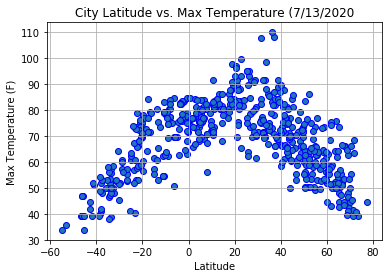

<Figure size 432x288 with 0 Axes>

In [165]:
Lat = weather_df['Latitude']
Max_Temp = weather_df['Max Temperature (F)']

plt.scatter(Lat, Max_Temp, edgecolors='b')
plt.title("City Latitude vs. Max Temperature (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
fig = plt.figure()
fig.savefig('Output_Data/lat_temp_scatter.png')

## Latitude vs. Humidity Plot

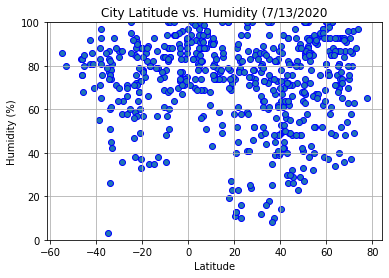

<Figure size 432x288 with 0 Axes>

In [166]:
Humid = weather_df['Humidity']

plt.scatter(Lat, Humid, edgecolors='b')
plt.title("City Latitude vs. Humidity (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,100)
plt.grid()
fig = plt.figure()
fig.savefig('Output_Data/lat_hum_scatter.png')

## Latitude vs. Cloudiness Plot

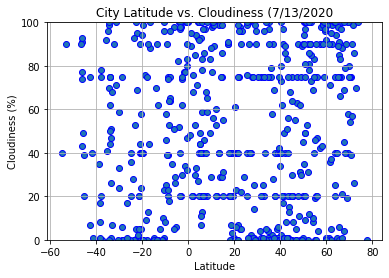

<Figure size 432x288 with 0 Axes>

In [167]:
Clouds = weather_df['Cloudiness']

plt.scatter(Lat, Clouds, edgecolors='b')
plt.title("City Latitude vs. Cloudiness (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,100)
plt.grid()
fig = plt.figure()
fig.savefig('Output_Data/lat_cloud_scatter.png')

## Latitude vs. Wind Speed Plot

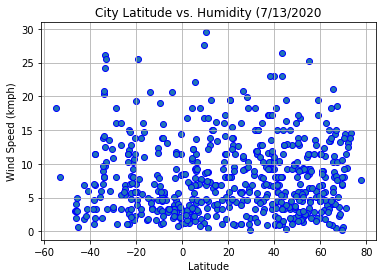

<Figure size 432x288 with 0 Axes>

In [168]:
Wind = weather_df['Wind Speed']

plt.scatter(Lat, Wind, edgecolors='b')
plt.title("City Latitude vs. Humidity (7/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.grid()
fig = plt.figure()
fig.savefig('Output_Data/lat_wind_scatter.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.4456.


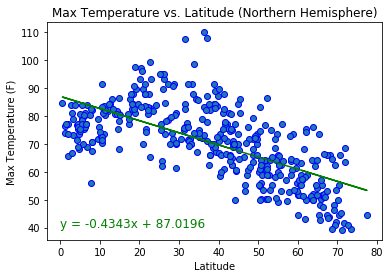

<Figure size 432x288 with 0 Axes>

In [170]:
northern_weather_df = weather_df[weather_df['Latitude'] > 0]
southern_weather_df = weather_df[weather_df['Latitude'] < 0]

North_Lat = northern_weather_df['Latitude']
North_Max_Temp = northern_weather_df['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Max_Temp)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Max_Temp, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,40), fontsize=12,color="green")
plt.title('Max Temperature vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_temp_reg_north.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.6621.


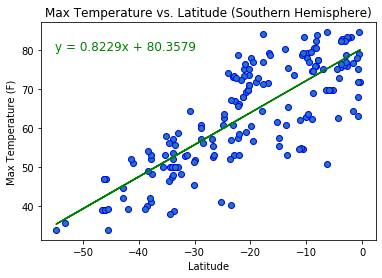

<Figure size 432x288 with 0 Axes>

In [171]:
South_Lat = southern_weather_df['Latitude']
South_Max_Temp = southern_weather_df['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Max_Temp)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Max_Temp, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-55,80), fontsize=12,color="green")
plt.title('Max Temperature vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_temp_reg_south.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.0022.


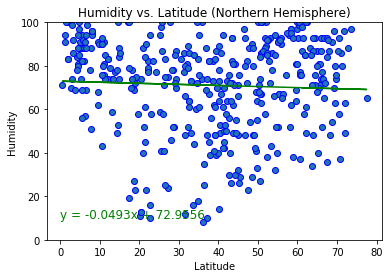

<Figure size 432x288 with 0 Axes>

In [172]:
North_Lat = northern_weather_df['Latitude']
North_Humidity = northern_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Humidity)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Humidity, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,10), fontsize=12,color="green")
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_hum_reg_north.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.0122.


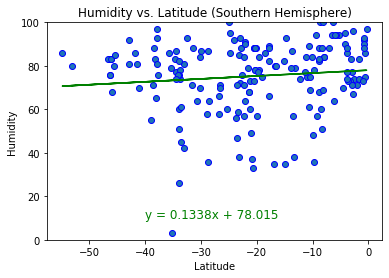

<Figure size 432x288 with 0 Axes>

In [173]:
South_Lat = southern_weather_df['Latitude']
South_Humidity = southern_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Humidity)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Humidity, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-40,10), fontsize=12,color="green")
plt.title('Humidity vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_hum_reg_south.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.0023.


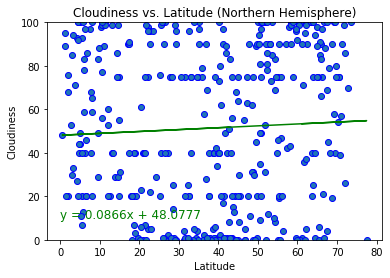

<Figure size 432x288 with 0 Axes>

In [174]:
North_Lat = northern_weather_df['Latitude']
North_Cloudiness = northern_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Cloudiness)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Cloudiness, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,10), fontsize=12,color="green")
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_cloud_reg_north.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.0147.


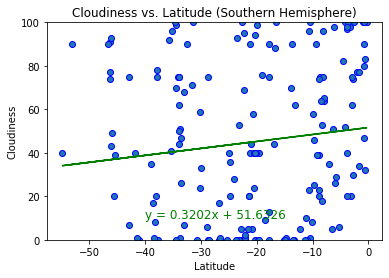

<Figure size 432x288 with 0 Axes>

In [175]:
South_Lat = southern_weather_df['Latitude']
South_Cloudiness = southern_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Cloudiness)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Cloudiness, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-40,10), fontsize=12,color="green")
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0,100)
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_cloud_reg_south.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.0003.


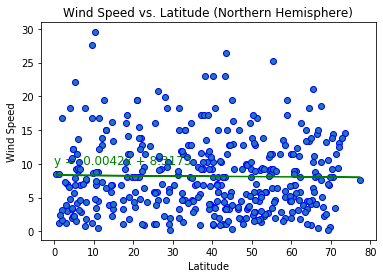

<Figure size 432x288 with 0 Axes>

In [187]:
North_Lat = northern_weather_df['Latitude']
North_Wind = northern_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Lat, North_Wind)
regression = North_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(North_Lat, North_Wind, edgecolors="b")
plt.plot(North_Lat, regression, "g-")
plt.annotate(linear_equation, (0,10), fontsize=12,color="green")
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r squared value is " + str(round(rsquared, 4)) + ".")
fig = plt.figure()
fig.savefig('Output_Data/lat_wind_reg_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.0107.


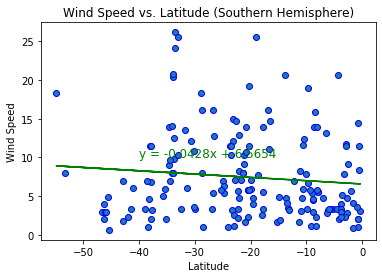

<Figure size 432x288 with 0 Axes>

In [189]:
South_Lat = southern_weather_df['Latitude']
South_Wind = southern_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Lat, South_Wind)
regression = South_Lat * slope + intercept
linear_equation = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
rsquared = rvalue * rvalue

plt.scatter(South_Lat, South_Wind, edgecolors="b")
plt.plot(South_Lat, regression, "g-")
plt.annotate(linear_equation, (-40,10), fontsize=12,color="green")
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r squared value is " + str(round(rsquared, 4)) + ".")

fig = plt.figure()
fig.savefig('Output_Data/lat_wind_reg_south.png')